In [1]:
# Clear Global Environment
rm(list = ls())

getwd()
setwd("/Users/Lingyi/TAD/lab/Text-as-Data-Lab-Spr2018/W3_02-08-18")

[1] "/Users/Lingyi/TAD/lab/Text-as-Data-Lab-Spr2018/W3_02-08-18"

In [2]:
# Libraries
library(quanteda)
library(quanteda.corpora)

quanteda version 1.0.0
Using 3 of 4 threads for parallel computing

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



In [3]:
## 2 Demonstrate Heap's law

#     M = kT^b

# M = vocab size
# T = number of tokens
# k, b are constants

tokens <- tokens(data_corpus_inaugural, removePunct=TRUE) 
Tee <- lengths(tokens)
Tee <- sum(Tee)

inaug_dfm <- dfm(data_corpus_inaugural)

M <- nfeat(inaug_dfm)

# Let's check using parameter values from MRS for a corpus with more than 100,000 tokens

k <- 44
b <- .49

k * (Tee)^b

[1] 15084.15

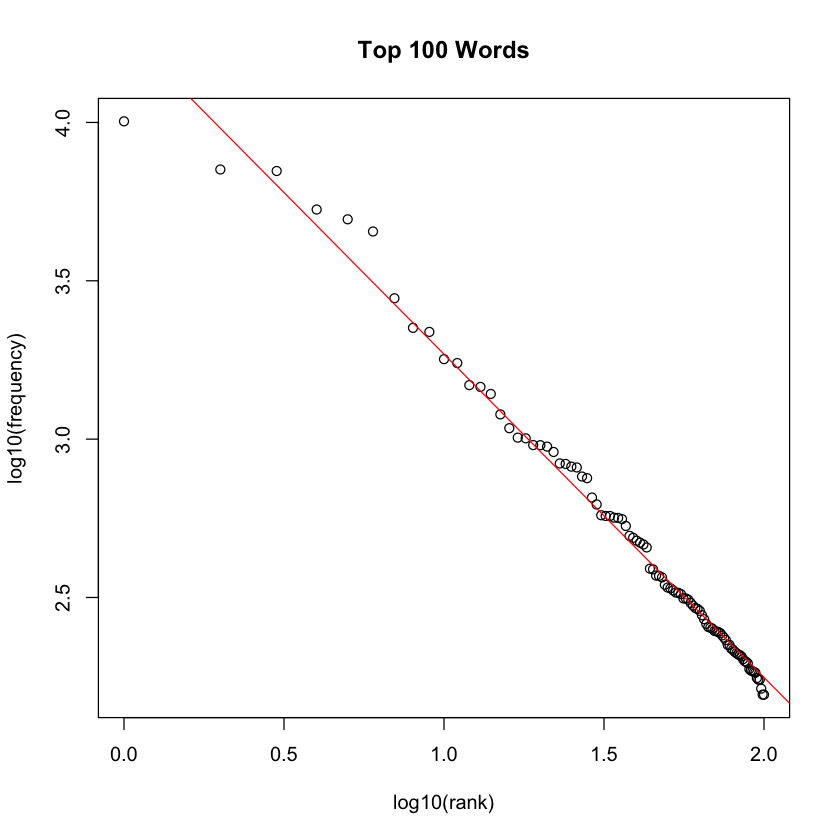

In [4]:
## 3 Demonstrate Zipf's law

plot(log10(1:100), log10(topfeatures(inaug_dfm, 100)),
     xlab="log10(rank)", ylab="log10(frequency)", main="Top 100 Words")

# Fits a linear regression to check if slope is approx -1.0
regression <- lm(log10(topfeatures(inaug_dfm, 100)) ~ log10(1:100))

# Adds the fitted line from regression to the plot
abline(regression, col="red")

In [5]:
# Returns the 95% confidence intervals for the regression coefficients
confint(regression)

,2.5 %,97.5 %
(Intercept),4.252963,4.3251105
log10(1:100),-1.042916,-0.9986484


In [6]:
# Provides R-squared, F-test, and cofficient estimates from regression
summary(regression)


Call:
lm(formula = log10(topfeatures(inaug_dfm, 100)) ~ log10(1:100))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.28549 -0.01420 -0.00635  0.01867  0.16100 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.28904    0.01818  235.94   <2e-16 ***
log10(1:100) -1.02078    0.01115  -91.52   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04473 on 98 degrees of freedom
Multiple R-squared:  0.9884,	Adjusted R-squared:  0.9883 
F-statistic:  8376 on 1 and 98 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),4.252963,4.3251105
log10(1:100),-1.042916,-0.9986484


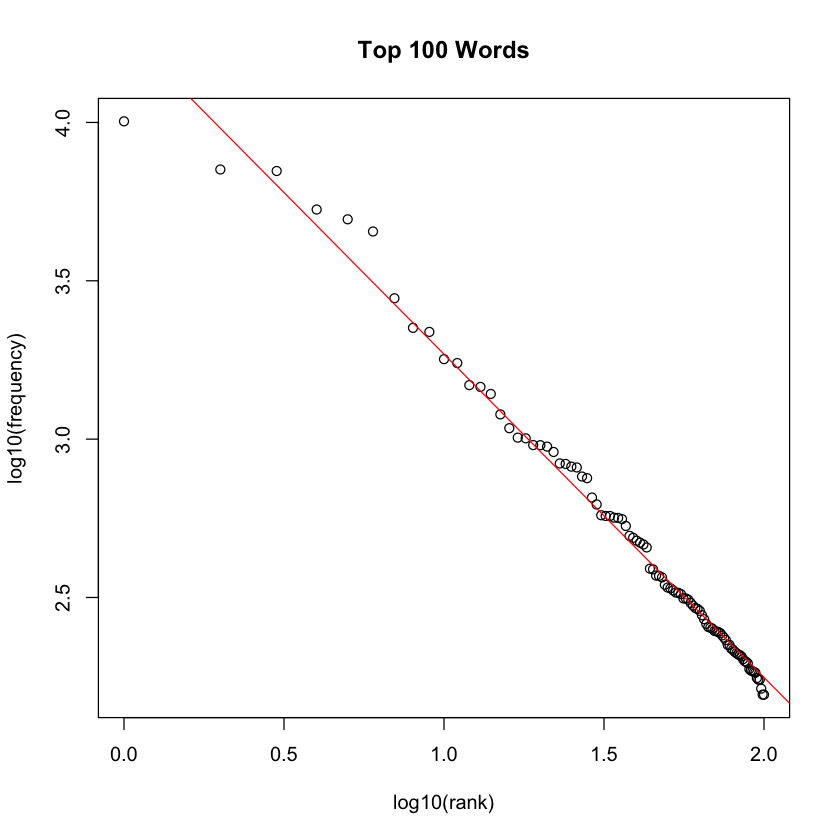

In [7]:
## 4 Stopwords: do they matter?

mydfm <- dfm(data_corpus_inaugural, remove=stopwords("english"))

plot(log10(1:100), log10(topfeatures(inaug_dfm, 100)),
     xlab="log10(rank)", ylab="log10(frequency)", main="Top 100 Words")

# Regression to check if slope is approx -1.0
regression <- lm(log10(topfeatures(inaug_dfm, 100)) ~ log10(1:100))
abline(regression, col="red")
confint(regression)

In [8]:
## 5 Key Words In Context (KWIC) is a good way to summarize info about a topic

kwic(data_corpus_inaugural, "terror", 3)

#help(kwic)

docname,from,to,pre,keyword,post
1797-Adams,1325,1325,"violence , by",terror,", intrigue ,"
1933-Roosevelt,112,112,"unreasoning , unjustified",terror,which paralyzes needed
1941-Roosevelt,287,287,by a fatalistic,terror,", we proved"
1961-Kennedy,866,866,uncertain balance of,terror,that stays the
1981-Reagan,813,813,Americans from the,terror,of runaway living
1997-Clinton,1055,1055,the fanaticism of,terror,. And they
1997-Clinton,1655,1655,strong defense against,terror,and destruction .
2009-Obama,1632,1632,aims by inducing,terror,and slaughtering innocents


In [9]:
## 6 Measuring similarity

# This helps illustrate the value of the vector representation

# Cosine similarity--take the dot product of two vectors

# x * y = |x||y|cos
# cos = x*y/|x||y|

x <- c(1,2,3)
y <- c(1,2,3)
 
# Define the norm function

norm_vec <- function(x) sqrt(sum(x^2))

x %*% y / (norm_vec(x)*norm_vec(y))

# What if they're different

a <- c(1,2,3)
b <- c(1,2,4000)

a %*% b / (norm_vec(a)*norm_vec(b))

1


0.8021177


In [10]:
# Let's do it with texts

last_speech_text <- data_corpus_inaugural[ndoc(data_corpus_inaugural)]
first_speech_text <- data_corpus_inaugural[1]

In [11]:
# Make a dfm of these two

first_last_dfm <- dfm(c(last_speech_text, first_speech_text), ignoredFeatures = stopwords("english"), stem = TRUE)

Warning message:
“Argument ignoredFeatures not used.”Warning message:
“Argument ignoredFeatures not used.”

In [12]:
# Calculate similarity

tmp <- textstat_simil(first_last_dfm, margin = "documents")

as.matrix(tmp)

,2017-Trump,1789-Washington
2017-Trump,1.0000000,0.7279634
1789-Washington,0.7279634,1.0000000


In [13]:
# Let's see how stopwords/stemming affect this

first_last_dfm <- dfm(c(last_speech_text, first_speech_text))

In [14]:
# Calculate similarity

tmp <- textstat_simil(first_last_dfm, margin = "documents")

as.matrix(tmp)

,2017-Trump,1789-Washington
2017-Trump,1.0000000,0.7324346
1789-Washington,0.7324346,1.0000000


In [15]:
# Make a dfm of a bunch

several_inaug_dfm <- dfm(corpus_subset(data_corpus_inaugural , Year > 1980), remove = stopwords("english"), stem = TRUE)

In [16]:
# Calculate similarity

tmp <- textstat_simil(several_inaug_dfm, margin = "documents")

as.matrix(tmp)

,1981-Reagan,1985-Reagan,1989-Bush,1993-Clinton,1997-Clinton,2001-Bush,2005-Bush,2009-Obama,2013-Obama,2017-Trump
1981-Reagan,1.0000000,0.9704059,0.9603411,0.9443849,0.9366096,0.9494593,0.9323529,0.9423306,0.9384555,0.9348161
1985-Reagan,0.9704059,1.0000000,0.9557316,0.9485131,0.9480250,0.9416197,0.9322253,0.9441305,0.9421446,0.9335340
1989-Bush,0.9603411,0.9557316,1.0000000,0.9374917,0.9379579,0.9545460,0.9345042,0.9475499,0.9394478,0.9431783
1993-Clinton,0.9443849,0.9485131,0.9374917,1.0000000,0.9271750,0.9308542,0.9183421,0.9096792,0.9209066,0.9194515
1997-Clinton,0.9366096,0.9480250,0.9379579,0.9271750,1.0000000,0.9307404,0.9053546,0.9421327,0.9357481,0.9268390
2001-Bush,0.9494593,0.9416197,0.9545460,0.9308542,0.9307404,1.0000000,0.9432043,0.9321777,0.9399379,0.9409308
2005-Bush,0.9323529,0.9322253,0.9345042,0.9183421,0.9053546,0.9432043,1.0000000,0.9044703,0.9228413,0.9267296
2009-Obama,0.9423306,0.9441305,0.9475499,0.9096792,0.9421327,0.9321777,0.9044703,1.0000000,0.9427078,0.9292572
2013-Obama,0.9384555,0.9421446,0.9394478,0.9209066,0.9357481,0.9399379,0.9228413,0.9427078,1.0000000,0.9252686
2017-Trump,0.9348161,0.9335340,0.9431783,0.9194515,0.9268390,0.9409308,0.9267296,0.9292572,0.9252686,1.0000000


In [17]:
# Specific comparisons

similarity(several_inaug_dfm, "2009-Obama", n = 5, margin = "documents")

ERROR: Error in similarity(several_inaug_dfm, "2009-Obama", n = 5, margin = "documents"): could not find function "similarity"


In [18]:
# Specific comparisons

textstat_simil(several_inaug_dfm, "2009-Obama", margin = "documents")

             2009-Obama
2009-Obama    1.0000000
1981-Reagan   0.9423306
1985-Reagan   0.9441305
1989-Bush     0.9475499
1993-Clinton  0.9096792
1997-Clinton  0.9421327
2001-Bush     0.9321777
2005-Bush     0.9044703
2013-Obama    0.9427078
2017-Trump    0.9292572